### 2020 Lavickova et al. A self-regenerating synthetic cell model: Model plots, concentration timeseries
Nadanai Laohakunakorn (University of Edinburgh), nadanai.laohakunakorn@ed.ac.uk

In [1]:
using DelimitedFiles
using Plots
using DifferentialEquations
using ProgressBars
using Statistics
using PyCall

include("../scripts/models.jl");
include("../scripts/callbacks.jl");
include("../scripts/solve.jl");

In [2]:
# Global settings
Plots.pyplot()
PATH_OUT = "../output/"
fntsm = Plots.font("sans-serif", pointsize=round(14.0))
fntlg = Plots.font("sans-serif", pointsize=round(18.0))
default(titlefont=fntlg, guidefont=fntlg, tickfont=fntlg, legendfont=fntsm)

TMAX = 30.0*60 # in minutes
INTERVAL_DIL = 15.0 # in minutes
DIL_FRAC = 0.2;
NSPECIES = 7
SWITCHTIMES = [4.0,16.0] # Time to swap between experimental stages

# Define names for species indices
idx_R=1;
idx_dT=2;
idx_dG=3;
idx_mT=4;
idx_mG=5;
idx_pT=6;
idx_pG=7;

idx_TX = 8;
idx_TL = 9;

# 2. Concentration time series

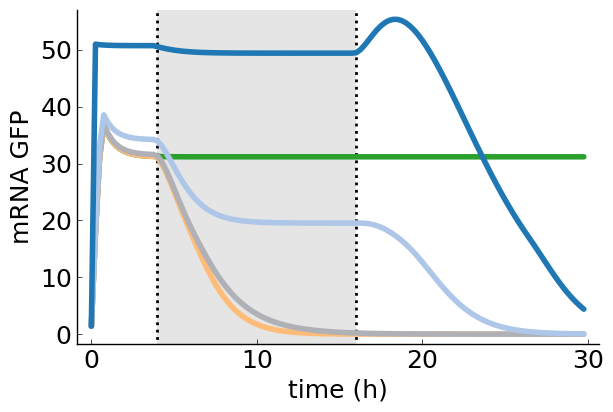

In [3]:
# 2.1 mRNA GFP
CONCS = [0.001,0.01,1]
LABELS = ["SR low", "SR medium", "SR high"]
COLOURS = ["#afb1b6","#aec7e8","#1f77b4"]
p2 = plot(grid=:false,legend=:false)#,legend=:outertopright)
vspan!([4,16],fill=:black,alpha=:0.1); vline!([4,16],color=:black,linestyle=:dot,linewidth=2);
FN="TS_GFPm.pdf"

# Set initial conditions

R0=100.0;
dT0=0.0;
dG0=2.0;
mT0=0.0;
mG0=0.0;
pT0=1.0;
pG0=0.0;

alpha=0.7;
beta=0.07;
K=1.0;
u0 = [R0,dT0,dG0,mT0,mG0,pT0,pG0];
params = [alpha,beta,K];

#TSAVE = 0.0:5.0:TMAX # either array or range can be passed
TSAVE = collect(0:15:TMAX).+1 
solU,solDU=solvemodel(grads,u0,params,TMAX,INTERVAL_DIL,TSAVE,DIL_FRAC,NSPECIES,SWITCHTIMES,"PC");
t = solU.t/60;
mGPC = [datum for subarr in solU.u for datum in subarr[idx_mG]];

solU,solDU=solvemodel(grads,u0,params,TMAX,INTERVAL_DIL,TSAVE,DIL_FRAC,NSPECIES,SWITCHTIMES,"NC");
mGNC = [datum for subarr in solU.u for datum in subarr[idx_mG]];

plot!(t,mGPC,label="PC",color="#2ca02c",xaxis="time (h)",yaxis="mRNA GFP",lw=4);
plot!(t,mGNC,label="NC",color="#ffbb78",lw=4)

for j in (1:size(CONCS)[1])
    dT0=CONCS[j]
    u0 = [R0,dT0,dG0,mT0,mG0,pT0,pG0];
    params = [alpha,beta,K];
    solU,solDU=solvemodel(grads,u0,params,TMAX,INTERVAL_DIL,TSAVE,DIL_FRAC,NSPECIES,SWITCHTIMES,"SR");
    mG = [datum for subarr in solU.u for datum in subarr[idx_mG]];
    plot!(t,mG,label=LABELS[j],color=COLOURS[j],lw=4)
end

p2 # Show plot
savefig(PATH_OUT*FN)

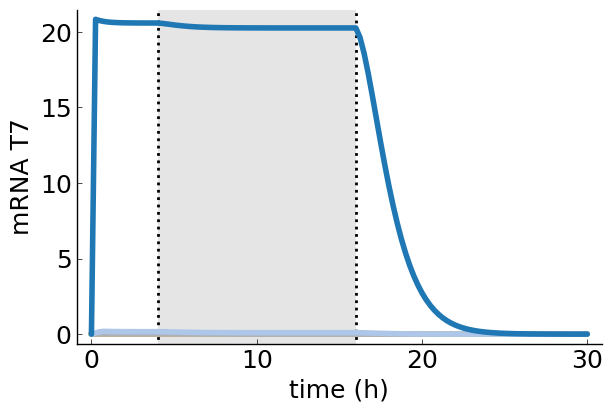

In [4]:
# 2.2 mRNA T7
CONCS = [0.001,0.01,1]
LABELS = ["SR low", "SR medium", "SR high"]
COLOURS = ["#afb1b6","#aec7e8","#1f77b4"]
p3 = plot(grid=:false,legend=:false)#,legend=:outertopright)
vspan!([4,16],fill=:black,alpha=:0.1); vline!([4,16],color=:black,linestyle=:dot,linewidth=2);
FN="TS_T7m.pdf"

# Set initial conditions

R0=100.0;
dT0=0.0;
dG0=2.0;
mT0=0.0;
mG0=0.0;
pT0=1.0;
pG0=0.0;

alpha=0.7;
beta=0.07;
K=1.0;
u0 = [R0,dT0,dG0,mT0,mG0,pT0,pG0];
params = [alpha,beta,K];

#TSAVE = 0.0:5.0:TMAX # either array or range can be passed
TSAVE = collect(0:15:TMAX)
solU,solDU=solvemodel(grads,u0,params,TMAX,INTERVAL_DIL,TSAVE,DIL_FRAC,NSPECIES,SWITCHTIMES,"PC");
t = solU.t/60;
mTPC = [datum for subarr in solU.u for datum in subarr[idx_mT]];

solU,solDU=solvemodel(grads,u0,params,TMAX,INTERVAL_DIL,TSAVE,DIL_FRAC,NSPECIES,SWITCHTIMES,"NC");
mTNC = [datum for subarr in solU.u for datum in subarr[idx_mT]];

plot!(t,mTPC,label="PC",color="#2ca02c",xaxis="time (h)",yaxis="mRNA T7",lw=4);
plot!(t,mTNC,label="NC",color="#ffbb78",lw=4)

for j in (1:size(CONCS)[1])
    dT0=CONCS[j]
    u0 = [R0,dT0,dG0,mT0,mG0,pT0,pG0];
    params = [alpha,beta,K];
    solU,solDU=solvemodel(grads,u0,params,TMAX,INTERVAL_DIL,TSAVE,DIL_FRAC,NSPECIES,SWITCHTIMES,"SR");
    mT = [datum for subarr in solU.u for datum in subarr[idx_mT]];
    plot!(t,mT,label=LABELS[j],color=COLOURS[j],lw=4)
end

p3 # Show plot
savefig(PATH_OUT*FN)

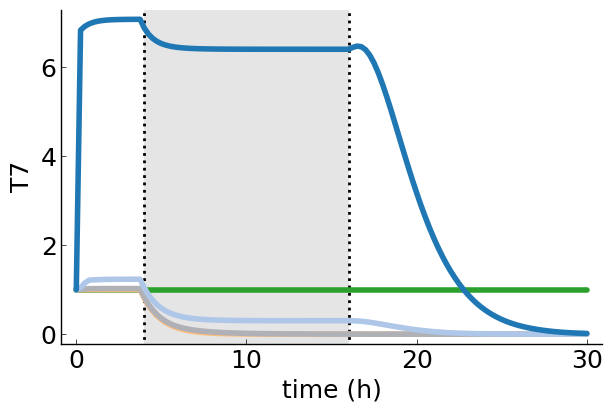

In [5]:
# 2.3 T7 RNAP
CONCS = [0.001,0.01,1]
LABELS = ["SR low", "SR medium", "SR high"]
COLOURS = ["#afb1b6","#aec7e8","#1f77b4"]
p4 = plot(grid=:false,legend=:false)#,legend=:outertopright)
vspan!([4,16],fill=:black,alpha=:0.1); vline!([4,16],color=:black,linestyle=:dot,linewidth=2);
FN="TS_T7.pdf"

# Set initial conditions

R0=100.0;
dT0=0.0;
dG0=2.0;
mT0=0.0;
mG0=0.0;
pT0=1.0;
pG0=0.0;

alpha=0.7;
beta=0.07;
K=1.0;
u0 = [R0,dT0,dG0,mT0,mG0,pT0,pG0];
params = [alpha,beta,K];

#TSAVE = 0.0:5.0:TMAX # either array or range can be passed
TSAVE = collect(0:15:TMAX) 
solU,solDU=solvemodel(grads,u0,params,TMAX,INTERVAL_DIL,TSAVE,DIL_FRAC,NSPECIES,SWITCHTIMES,"PC");
t = solU.t/60;
pTPC = [datum for subarr in solU.u for datum in subarr[idx_pT]];

solU,solDU=solvemodel(grads,u0,params,TMAX,INTERVAL_DIL,TSAVE,DIL_FRAC,NSPECIES,SWITCHTIMES,"NC");
pTNC = [datum for subarr in solU.u for datum in subarr[idx_pT]];

plot!(t,pTPC,label="PC",color="#2ca02c",xaxis="time (h)",yaxis="T7",lw=4);
plot!(t,pTNC,label="NC",color="#ffbb78",lw=4)

for j in (1:size(CONCS)[1])
    dT0=CONCS[j]
    u0 = [R0,dT0,dG0,mT0,mG0,pT0,pG0];
    params = [alpha,beta,K];
    solU,solDU=solvemodel(grads,u0,params,TMAX,INTERVAL_DIL,TSAVE,DIL_FRAC,NSPECIES,SWITCHTIMES,"SR");
    pT = [datum for subarr in solU.u for datum in subarr[idx_pT]];
    plot!(t,pT,label=LABELS[j],color=COLOURS[j],lw=4)
end

p4 # Show plot
savefig(PATH_OUT*FN)

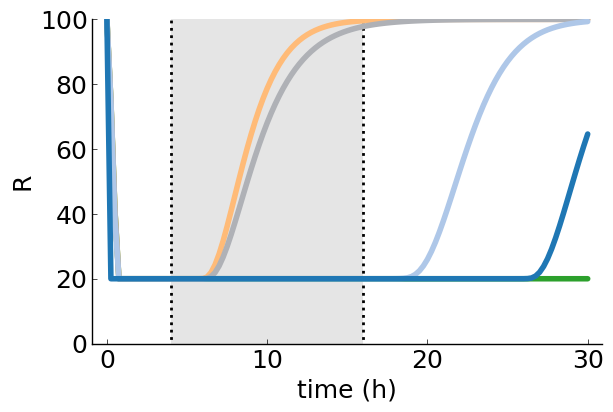

In [6]:
# 2.4 Resources
CONCS = [0.001,0.01,1]
LABELS = ["SR low", "SR medium", "SR high"]
COLOURS = ["#afb1b6","#aec7e8","#1f77b4"]
p3 = plot(grid=:false,legend=:false)#,legend=:outertopright)
vspan!([4,16],fill=:black,alpha=:0.1); vline!([4,16],color=:black,linestyle=:dot,linewidth=2);
ylims!((0,100));
FN="TS_R.pdf"

# Set initial conditions

R0=100.0;
dT0=0.0;
dG0=2.0;
mT0=0.0;
mG0=0.0;
pT0=1.0;
pG0=0.0;

alpha=0.7;
beta=0.07;
K=1.0;
u0 = [R0,dT0,dG0,mT0,mG0,pT0,pG0];
params = [alpha,beta,K];

#TSAVE = 0.0:5.0:TMAX # either array or range can be passed
TSAVE = collect(0:15:TMAX)
solU,solDU=solvemodel(grads,u0,params,TMAX,INTERVAL_DIL,TSAVE,DIL_FRAC,NSPECIES,SWITCHTIMES,"PC");
t = solU.t/60;
RPC = [datum for subarr in solU.u for datum in subarr[idx_R]];

solU,solDU=solvemodel(grads,u0,params,TMAX,INTERVAL_DIL,TSAVE,DIL_FRAC,NSPECIES,SWITCHTIMES,"NC");
RNC = [datum for subarr in solU.u for datum in subarr[idx_R]];

plot!(t,RPC,label="PC",color="#2ca02c",xaxis="time (h)",yaxis="R",lw=4);
plot!(t,RNC,label="NC",color="#ffbb78",lw=4)

for j in (1:size(CONCS)[1])
    dT0=CONCS[j]
    u0 = [R0,dT0,dG0,mT0,mG0,pT0,pG0];
    params = [alpha,beta,K];
    solU,solDU=solvemodel(grads,u0,params,TMAX,INTERVAL_DIL,TSAVE,DIL_FRAC,NSPECIES,SWITCHTIMES,"SR");
    R = [datum for subarr in solU.u for datum in subarr[idx_R]];
    plot!(t,R,label=LABELS[j],color=COLOURS[j],lw=4)
end

p3 # Show plot
savefig(PATH_OUT*FN)